In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname, join
path = dirname(dirname(getcwd()))
sys.path.append(path)

In [2]:
from MintPy.interpret_toolkit import InterpretToolkit
from MintPy.utils import (combine_top_features, 
                          load_pickle)
import plotting_config
import pandas as pd
import numpy as np
from joblib import load

# Load in Models and Data

In [3]:
# Load the model objects. In this case, we are using two popular scikit-learn tree-based methods.
model_filepath = join(getcwd(), 'models')
model_fname = ['RandomForestClassifier.pkl',  'GradientBoostingClassifier.pkl']
model_names = ['Random Forest', 'Gradient Boosting']
model_objs = [load(join(model_filepath, fname)) for fname in model_fname]

#Import the training dataset
data_filename = join(getcwd(), 'data', 'data_for_mintpy.csv')

# Load the examples the models were trained on.
TARGET_COLUMN = 'cat_rt'
data  = pd.read_csv(data_filename)

examples = data[plotting_config.cols_to_use]
targets = data[TARGET_COLUMN].values

# Initializing InterpretToolkit

To initialize `InterpretToolkit`, requires a model object (e.g., a trained sci-kit learn model object) or a list of model objects and examples and targets to evalute the model(s) on. `examples` and `targets` can be `pandas.DataFrame` or `numpy.array`, but if you are using arrays, then you must provide the feature names. 

In [4]:
myInterpreter = InterpretToolkit(model=model_objs, 
                                 model_names=model_names,
                                 examples=examples, 
                                 targets=targets,
                                )

In [5]:
results_filepath = join(getcwd(), 'results')

# Load the permutation important results from the saved pickle file
results = load_pickle(fnames=join(results_filepath,'multipass_importance.pkl'))

# Set the permutation importance results as class attribute (for plotting purposes)
myInterpreter.set_results(results=results, 
                          option='permutation_importance'
                         )

important_vars = myInterpreter.get_important_vars(results, multipass=True)
important_vars = combine_top_features(important_vars, nvars=7)
print(important_vars)

['uplwav_flux', 'tmp2m_hrs_ab_frez', 'sfcT_hrs_ab_frez', 'sfc_temp', 'date_marker', 'temp2m', 'tmp2m_hrs_bl_frez', 'sfcT_hrs_bl_frez', 'swave_flux']


# Accumulated Local Effect Plots

Once we known what features are important, we explore their functional relationship with the target variable. MintPy has a built-in function to take the important features from multiple model turn it into a single list with any duplicate features removed. 

Using 7 processors...


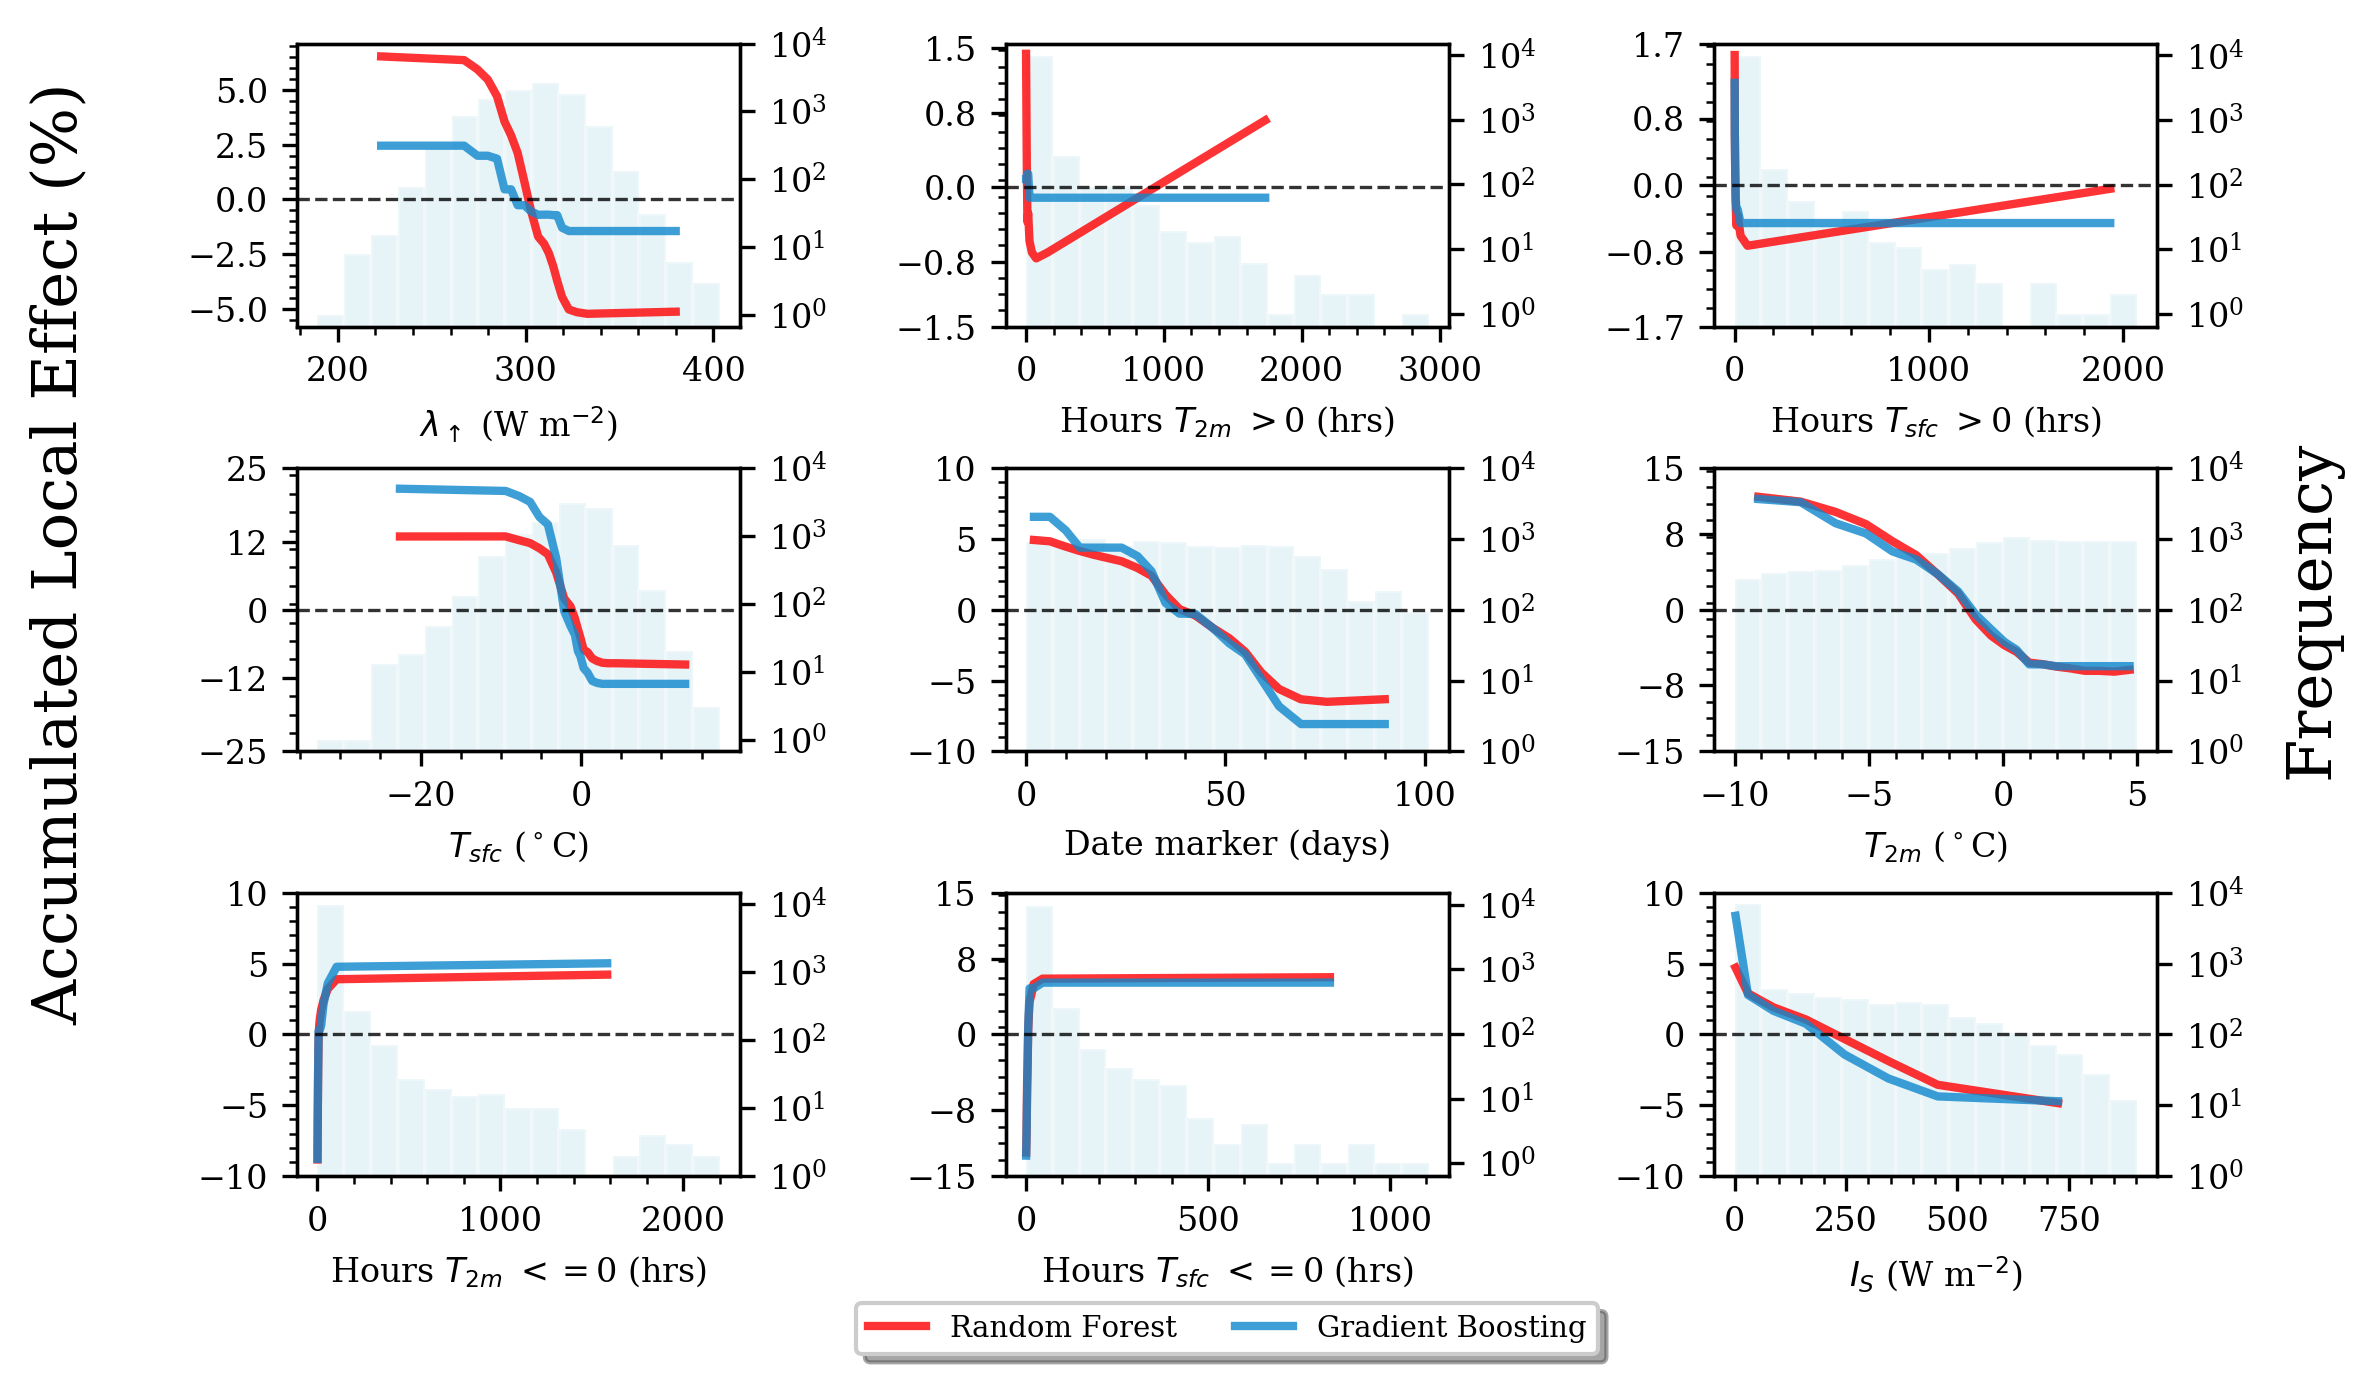

In [6]:
results = myInterpreter.calc_ale(features=important_vars, 
                                 nbootstrap=1, 
                                 subsample=0.1, 
                                 njobs=7, 
                                 nbins=20
                                )
fig, axes = myInterpreter.plot_ale(feature_units=plotting_config.feature_units,
                                   readable_feature_names=plotting_config.readable_feature_names
                                  )